# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<p><i><span style="color:#1c70b2">The dataset used here has information about <b>17 marketing campaigns </b> conducted between May 2008 and November 2010. There were phone campaigns conducted for a total of 79,354 contacts where an attractive long-term deposit with good interest rates was offered. For the whole dataset, there were 6,499 successes (8% success rate) - the dataset includes the attributes stored for each contact and a variable to indicate success. </i></p>   

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [196]:
import pandas as pd

In [197]:
#Additional packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [198]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 150

In [199]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [200]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [201]:
#First let us do a df.info() to get a quick view of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<span style="color:#1c70b2">
<i>The above indicates that there are <b>21 columns with no null values</b>. The column names match the given description as well. The numeric columns in the given description are either int64 (age, duration, campaign, pdays, previous) or float64 (emp.var.rate, cons.price.idx,cons.conf.idx, euribor3m, nr.employed). All the other columns are categorical which have the dtype object in the dataframe as well.</i><br><br>

<i> Assuming y is the target variable (which we know is the success indicator of a deposit being made, we can also change the column heading to something more intuitive </i>

In [202]:
df.rename(columns = {'y':'success'}, inplace = True)

<span style="color:#1c70b2"><i> The categorical columns are now plotted as bar charts - this will help us quickly see distribution across these columns and also see if there are any additional / missing values compared to the original description </i>

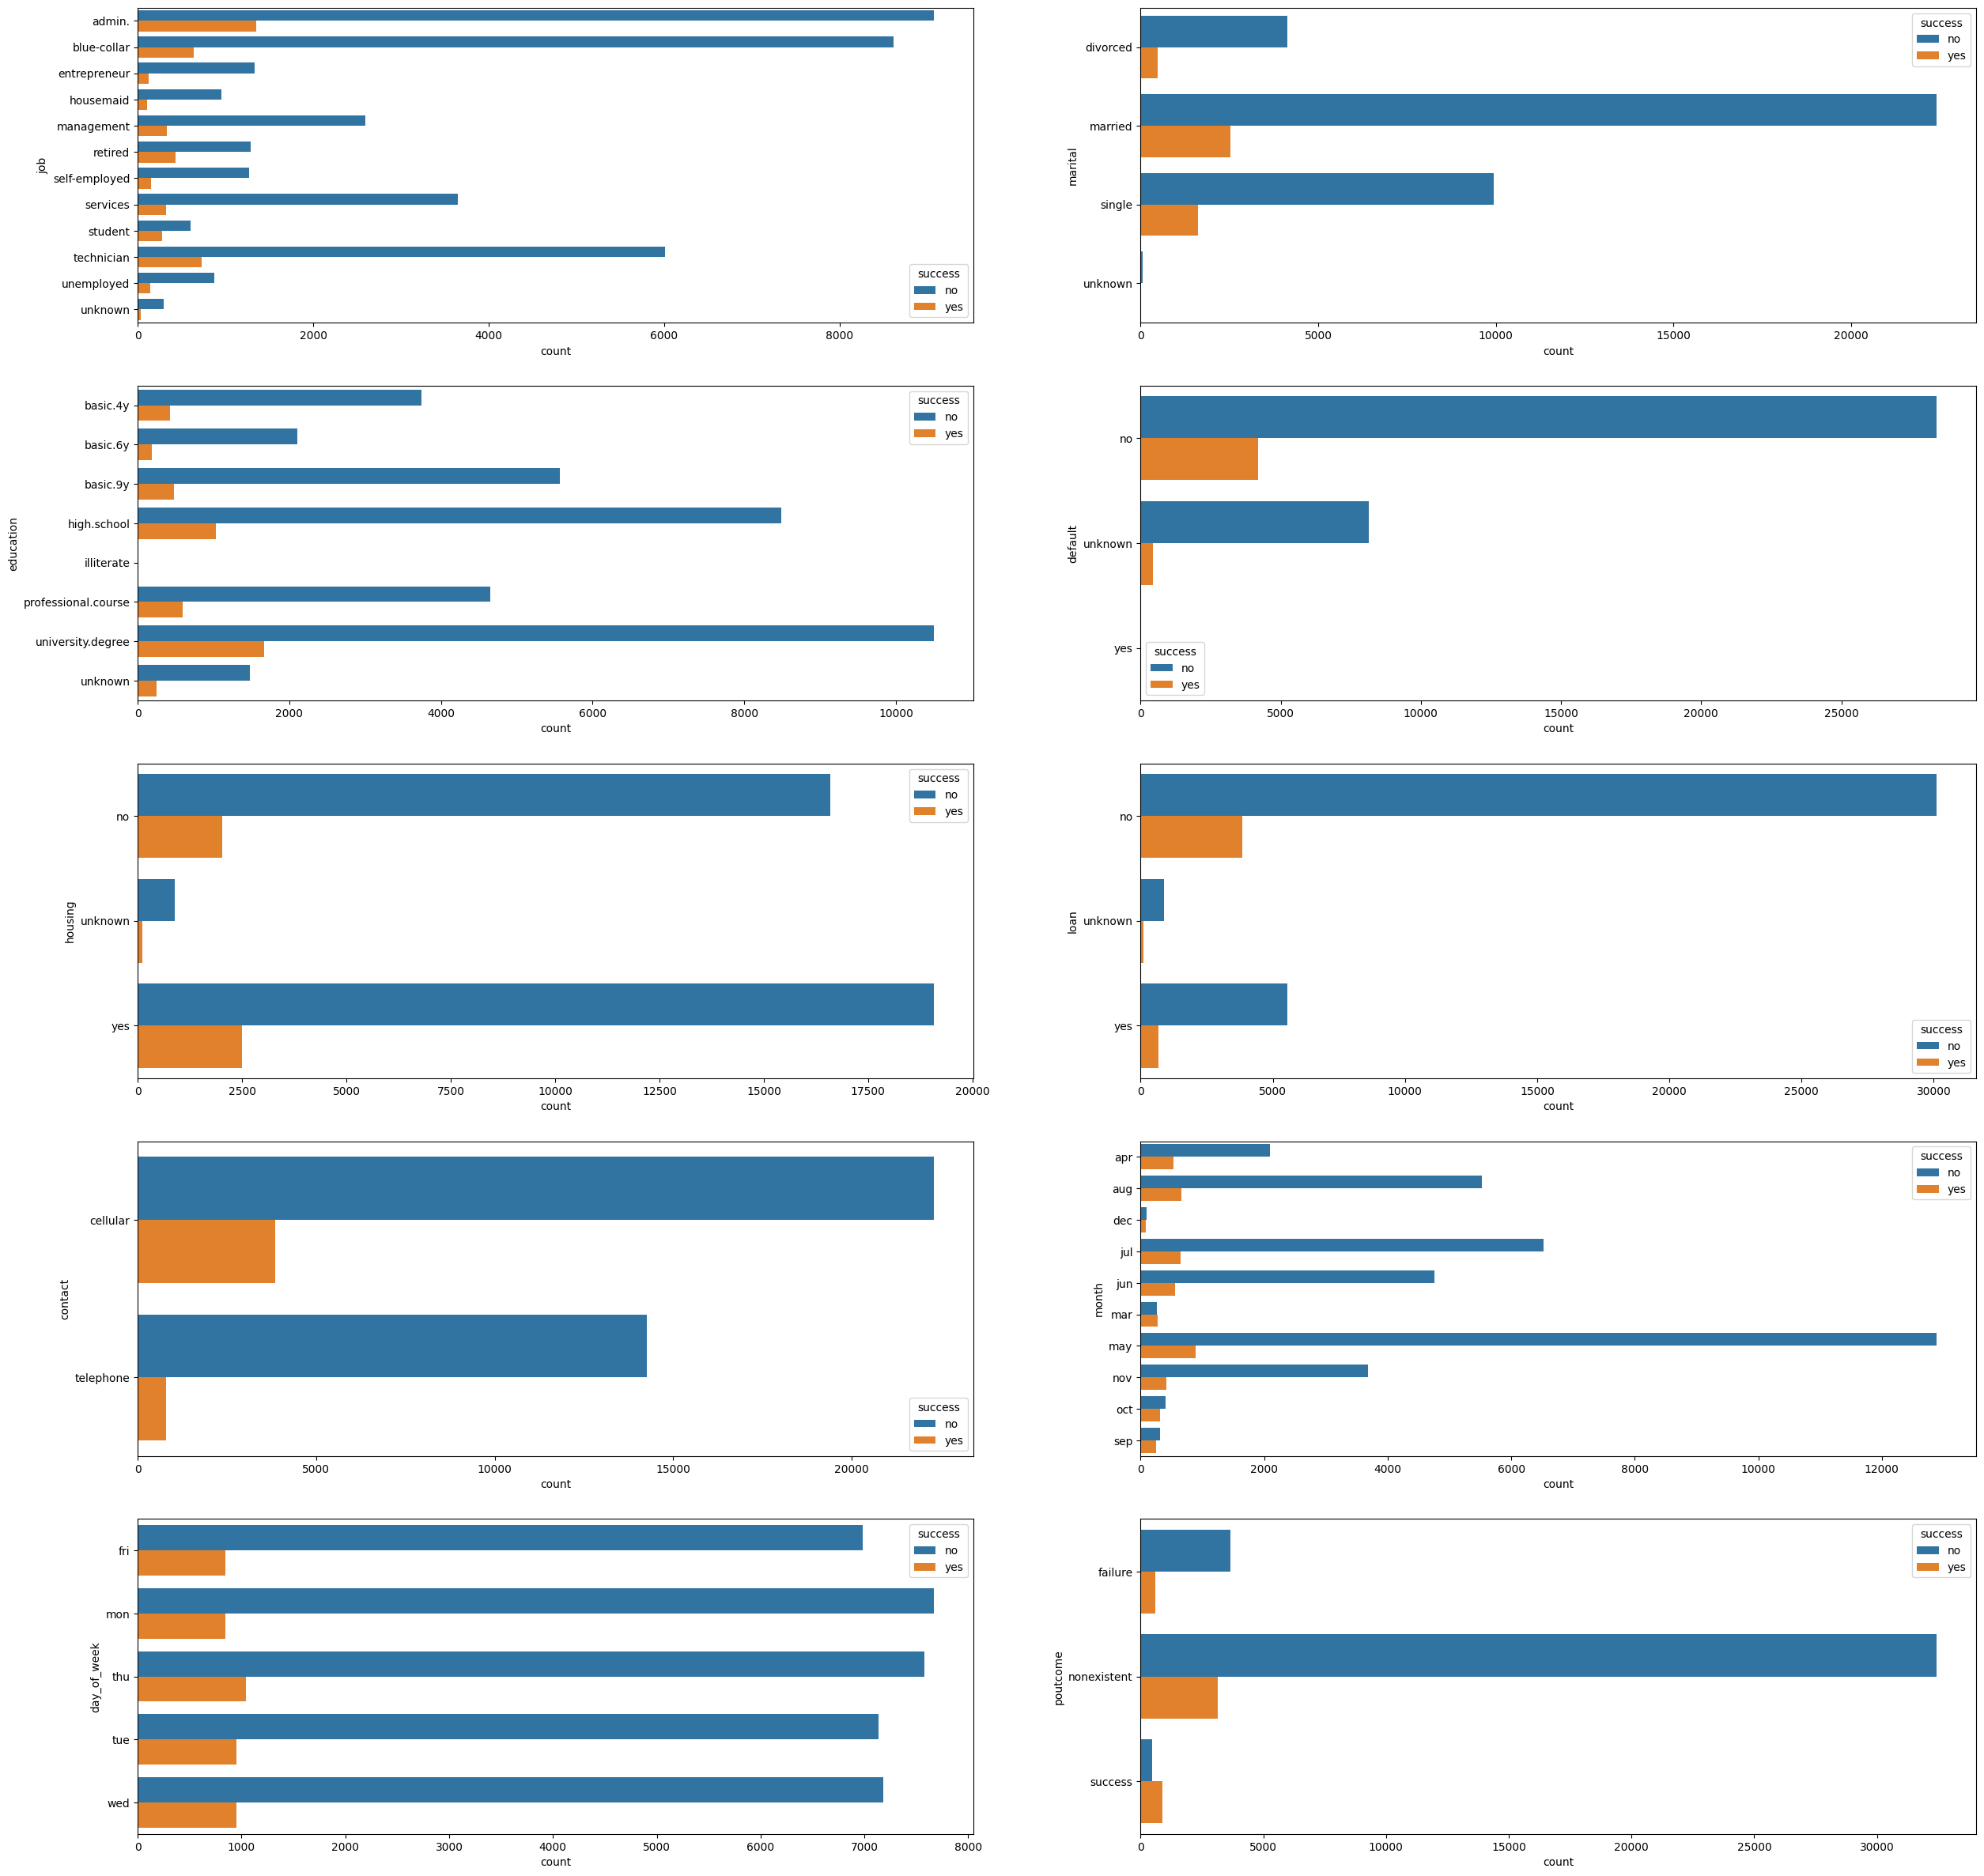

In [203]:
#View distribution of categorical columns
columnList = ['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome']
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(30,30))
i=0
axes = axes.flatten()
for col in columnList:
    df_sorted = df.sort_values(by=col, ascending=True)
    ax = sns.countplot(ax = axes[i],y =col, hue = "success", data = df_sorted)
    #if ((i+1)%3 == 0):
    #    j = j+1
    #i = (i+1)%3
    i = i+1

# Show the plot
plt.show()

<span style="color:#1c70b2">
<i> From the above charts, some quick inferences can be made:<br><br>
a) All the listed values across categorical colums in the description can be viewed in the graph as well except for a couple of months (Jan and Feb) and a couple of days (Saturday and Sunday). While the latter is expected because they are weekends, the fact that January and February months are missing is interesting to note.<br>
b) Looking at the job distribution, the majority of potential customers targeted have either admin, blue-collar of technician job profiles (~23,000 rows or 55% of the dataset)<br>
c) Looking at absolute call volumes, larger call volumes were targeted at people with no loans and no defaults<br>
d) While call volumes were mostly consistent across days, call volumes were the highest in May by a good margin. Call volumes were also higher in June-August compared to other months.<br><br>
While data type coercion may not be needed, encoding may be needed at subsequent stages to train a model.
</i>

In [204]:
#Reviewing the numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<span style="color:#1c70b2">
<i>From the above table the numerical columns may not need any data type changes - but the data may have to be normalized / standardized before model training <br>
<i>- The field pdays has a 75th percentile value of 0 with a max of 7 - hence it may not have a big influence on the success of getting a deposit. Similarly, the 25th percentile and maximum for pdays is the same which indicates it may also not be a signficant factor influencing the success of a deposit <br></i>
<i>- A similar assertion can be made for cons.price.index since the values do not vary a lot (standard deviation of 0.58, minimum if 92.2 and maximum of 94.7)</i>

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: ylabel='count'>

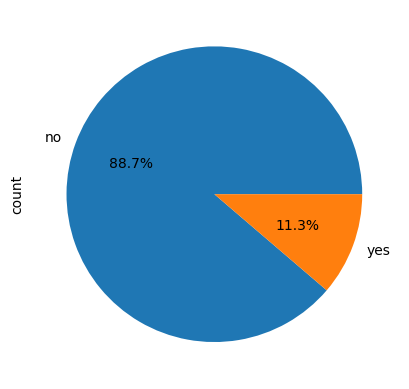

In [206]:
#Find the distribution of success
s = df['success'].value_counts()
s.head()
s.plot.pie(autopct='%1.1f%%')

<span style="color:#1c70b2">
    
<i> This dataset was collected from a Portugese bank that shows the results of multiple marketing campaigns.  Initial analysis shows that there is a low success rate (~11% from the data we have, 8% overall)  of getting deposits from potential clients with the current strategy<br><br>
The business objective is to develop a model that can improve the efficiency of marketing campaigns to improve the chances of having a client subscribe for a bank deposit- such a model will help optimize the use of available resource and enhance the quality of the target customer base </i>

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

<span style="color:#1c70b2">
<i><u>Step 1: Drop columns not needed for analysis</u><br>
<i>The below columns are being dropped from the analysis:<br>
<i>- The column 'putcome' has a large number of entries marked as nonexistent in its bar plot - hence it will not contribute much to the analysis</i>
<i>- For 'pdays', the 25th percentile and max values are the same (999) - hence it does not have a role in getting a successful deposit<br>
<i>- For 'previous', the minimum upto 75th percentile values are zero - hence it does not have a role in getting a successful deposit<br>
<i>- The columns 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed' have very low standard deviations which indicates that it may not influence the chances of getting a successful deposit<br>


In [207]:
#Step 1: Drop the columns not being considered for analysis
df_revised = df.drop(['poutcome','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)


<span style="color:#1c70b2">
<i><u>Step 2: Prepare column transformers for categorical and numerical columns:</u><br>
<i>The categorical columns ('job', 'marital', 'education','contact','month','day_of_week','default','housing','loan') need to be encoded so that they can be used for modeling - for this one hot encoding will be used. The numerical columns will be transormed using standard scaler to reduce the impact of outliers and make the data more efficient for model processing

In [208]:
# Create a dataset with columns 1-7 for features and deposit for target column
categorical_columns = ['job', 'marital', 'education','contact','month','day_of_week','default','housing','loan']
numerical_columns = ['age', 'duration', 'campaign']
#Create column transformer
ct = ColumnTransformer(
    transformers=[('one_hot', OneHotEncoder(), categorical_columns),('standard', StandardScaler(), numerical_columns)],
    remainder='passthrough'
)

<span style="color:#1c70b2">
<i><u>Step 3: Apply transformation on features</u><br>
We create our feature (X) and result (y) datasets and apply the required transformations on both<br>  

In [209]:
X = df_revised.drop(['success'],axis=1)
y = pd.DataFrame(df_revised['success'],columns=['success'])
#encode y to 0 (no) and 1 (yes)
le = LabelEncoder()
y['success'] = le.fit_transform(y['success'])
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1


In [210]:
y.head()

,success
0,0
1,0
2,0
3,0
4,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [212]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,77,3
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,12,4
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,277,2
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,70,1
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,1181,9


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

<span style="color:#1c70b2">
<i>Establishing a baseline model in machine learning is very helpful to generate a a simple point of comparison for the more complex models being considered. The baseline model is typically a simple statistical model and its performance provides a minimum threshold that all other complex models should exceeed significantly - if a complex model does not exceed the baseline model scores, then it may not be learning any additional information from the data. <br>

<i> Here, the majority class classifier model would be used as the baseline model. This will be implemented through the DummyClasifier module with the strategy set as "most_frequent"

In [213]:
#Transform X using our defined column transformer
dt_pipeline = Pipeline([('preprocessing', ct),
                     ('dummy_classifier', DummyClassifier(strategy='most_frequent'))])

In [214]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'day_of_week',
                                                   'default', 'housing',
                                                   'loan']),
                                                 ('standard', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign'])])),
                ('dummy_classifier',
                 DummyClassifier(strategy='most_frequent'))])

In [215]:
y_pred_baseline = dt_pipeline.predict(X_test)

In [216]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_baseline,pos_label=0):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_baseline,pos_label=0):.3f}")
print(f"F1: {f1_score(y_test, y_pred_baseline,pos_label=0):.3f}")

Accuracy: 0.888
Precision: 0.888
Recall: 1.000
F1: 0.940


<span style="color:#1c70b2">
<i> From the above, the DummyClassifier model will be predicting the most frequent value (which is 'no' or 0 in this case) - and it is <b>accurate 88% of the time</b></i> on the test data. <br>
We can ignore the other scores since:<br>
<i>- Precision score is expected to match accuracy score since true positives and false positives are equal to total number of observations. When <b>pos_label is set to 1 (predicting success) the score is 0</b> since the model predicts only 0s<br>
<i>-Recall score would be one in this case since there are no false negatives (where a record marked 'no' comes up as 'yes'). As with precision score, when <b>pos_label is set to 1 (predicting success) the score is 0</b><br>
<i>- F1 score is a harmonic mean of recall and precision scores - since both are not relevant here, the F1 score can be discarded

<span style="color:#1c70b2">
<i> Hence the model we build should have a better accuracy score than 0.888 - a lower score may indicate that the model wrongly predicts a non-successful client as making a successful deposit, which does not meet our business objective.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

<span style="color:#1c70b2">
<i> With the data preprocessing pipleine we built in problem 5 (variable 'ct'), the below code will run a logistic regression (LR) on the training data after which it will be used to run a prediction on the test data. 

In [217]:
start_time = time.time()
lr_pipeline = Pipeline([('preprocessing', ct),
                     ('logistic_regression', LogisticRegression())])
lr_model = lr_pipeline.fit(X_train, y_train['success'])
end_time = time.time()
training_time = end_time - start_time
y_pred = lr_model.predict(X_test)
print(f"Training time: {training_time:.3f} seconds")

Training time: 0.149 seconds


<span style="color:#1c70b2">
<i> The performance will be measured in the next section

### Problem 9: Score the Model

What is the accuracy of your model?

In [218]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred,pos_label=1):.3f}")
print(f"Recall: {recall_score(y_test, y_pred,pos_label=1):.3f}")
print(f"F1: {f1_score(y_test, y_pred,pos_label=1):.3f}")

Accuracy: 0.901
Precision: 0.627
Recall: 0.286
F1: 0.393


<span style="color:#1c70b2">
<i> The <b>accuracy score of 0.9</b> is marginally higher than the baseline model of 0.89 which indicates that the logistic regression model is able to learn something more to predict 'yes' accurately for some cases. The precision score of 0.627 indicates the model does a reasonable job to correctly predict successes, the recall score of 0.286 indicates that the model is <b>not able to capture positive instances</b> (successful deposits) with resonable accuracy. <br><br>
This indicates that while the model does a good job with overall accuracy, it is not able to predict a successful deposit with a reasonable amount of accuracy - one major reason for this is that that data is imbalanced with a majority of entries indicating no deposits were made. <br>For such scenarios with <b>imbalanced data where the cost of a false negative (a client who would make a deposit is incorrectly classified as a non-success) is very high, recall scores are more important than precision </b>. Since the recall score is low here, enhancements may be needed to make the model more suitable for the objective<br>

<span style="color:#1c70b2">
<i> An additional analysis that can be done is to look at the ROC curve. By plotting the ROC curve and also the area under it (AUC), it shows how the model performs for different thresholds of the logistic regression model (default is 0.5) by comparing the true positive rates to the false positive rates

AUC: 0.8956185912129218


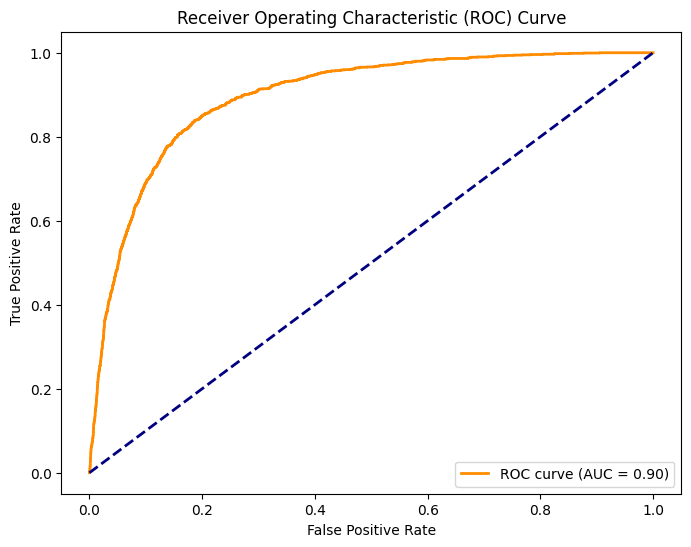

In [219]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print('AUC:', auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<span style="color:#1c70b2">
<i> An AUC score of 0.9 indicates that the model does a good job classifying - however a key point to note is that the data is highly imbalanced towards clients not making deposits.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [220]:
#Creating a dataframe to capture the required metrics
#dataframe to print the metrics as listed in the question
df_results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy','Test Accuracy'])
#dataframe for additional metrics
df_results_addl = pd.DataFrame(columns=['Model', 'Test Precision Score', 'Test Recall Score','Test F1 Score'])

<span style="color:#1c70b2">
<i><u><b>a) Capturing Metrics from Logistic Regression</b></u><br>
</i>

In [221]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('preprocessing', ct),
                     ('logistic_regression', LogisticRegression())])
model = pipeline.fit(X_train, y_train['success'])
end_time = time.time()
training_time = end_time - start_time

#Measure accuracy on training data
y_pred = model.predict(X_train)
training_score = accuracy_score(y_train, y_pred)

#Predict with test data and capture scores
y_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

#Update the results dataframe
df_results.loc[len(df_results)] = ['LR',training_time,training_score,test_score]
df_results_addl.loc[len(df_results_addl)] = ['LR',
                                             precision_score(y_test, y_pred,pos_label=1),
                                             recall_score(y_test, y_pred,pos_label=1),
                                             f1_score(y_test, y_pred,pos_label=1)]
display(df_results)
display(df_results_addl)


,Model,Train Time,Train Accuracy,Test Accuracy
0,LR,0.150082,0.898928,0.900623


,Model,Test Precision Score,Test Recall Score,Test F1 Score
0,LR,0.627172,0.285817,0.392681


<span style="color:#1c70b2">
<i><u><b>b) Capturing Metrics from KNN Algorithm</b></u><br>
</i>

In [222]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('preprocessing', ct),
                     ('knn', KNeighborsClassifier())])#using default neighbor setting as requested in the problem
model = pipeline.fit(X_train, y_train['success'])
end_time = time.time()
training_time = end_time - start_time

#Measure accuracy on training data
y_pred = model.predict(X_train)
training_score = accuracy_score(y_train, y_pred)

#Predict with test data and capture scores
y_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

#Update the results dataframe
df_results.loc[len(df_results)] = ['KNN',training_time,training_score,test_score]
df_results_addl.loc[len(df_results_addl)] = ['KNN',
                                             precision_score(y_test, y_pred,pos_label=1),
                                             recall_score(y_test, y_pred,pos_label=1),
                                             f1_score(y_test, y_pred,pos_label=1)]
display(df_results)
display(df_results_addl)


,Model,Train Time,Train Accuracy,Test Accuracy
0,LR,0.150082,0.898928,0.900623
1,KNN,0.073200,0.916444,0.893421


,Model,Test Precision Score,Test Recall Score,Test F1 Score
0,LR,0.627172,0.285817,0.392681
1,KNN,0.556962,0.253420,0.348342


<span style="color:#1c70b2">
<i><u><b>c) Capturing Metrics from Decision Trees</b></u><br>
</i>

In [223]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('preprocessing', ct),
                     ('classifier', DecisionTreeClassifier())])
model = pipeline.fit(X_train, y_train['success'])
end_time = time.time()
training_time = end_time - start_time

#Measure accuracy on training data
y_pred = model.predict(X_train)
training_score = accuracy_score(y_train, y_pred)

#Predict with test data and capture scores
y_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

#Update the results dataframe
df_results.loc[len(df_results)] = ['DT',training_time,training_score,test_score]
df_results_addl.loc[len(df_results_addl)] = ['DT',
                                             precision_score(y_test, y_pred,pos_label=1),
                                             recall_score(y_test, y_pred,pos_label=1),
                                             f1_score(y_test, y_pred,pos_label=1)]
display(df_results)
display(df_results_addl)



,Model,Train Time,Train Accuracy,Test Accuracy
0,LR,0.150082,0.898928,0.900623
1,KNN,0.073200,0.916444,0.893421
2,DT,0.805974,1.000000,0.863640


,Model,Test Precision Score,Test Recall Score,Test F1 Score
0,LR,0.627172,0.285817,0.392681
1,KNN,0.556962,0.253420,0.348342
2,DT,0.400404,0.428366,0.413913


<span style="color:#1c70b2">
<i><u><b>d) Capturing Metrics from SVM</b></u><br>
</i>

In [224]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('preprocessing', ct),
                     ('svm', SVC())])
model = pipeline.fit(X_train, y_train['success'])
end_time = time.time()
training_time = end_time - start_time

#Measure accuracy on training data
y_pred = model.predict(X_train)
training_score = accuracy_score(y_train, y_pred)

#Predict with test data and capture scores
y_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

#Update the results dataframe
df_results.loc[len(df_results)] = ['SVM',training_time,training_score,test_score]
df_results_addl.loc[len(df_results_addl)] = ['SVM',
                                             precision_score(y_test, y_pred,pos_label=1),
                                             recall_score(y_test, y_pred,pos_label=1),
                                             f1_score(y_test, y_pred,pos_label=1)]
display(df_results)
display(df_results_addl)


,Model,Train Time,Train Accuracy,Test Accuracy
0,LR,0.150082,0.898928,0.900623
1,KNN,0.073200,0.916444,0.893421
2,DT,0.805974,1.000000,0.863640
3,SVM,16.282284,0.912282,0.901999


,Model,Test Precision Score,Test Recall Score,Test F1 Score
0,LR,0.627172,0.285817,0.392681
1,KNN,0.556962,0.253420,0.348342
2,DT,0.400404,0.428366,0.413913
3,SVM,0.664815,0.258459,0.372214


<span style="color:#1c70b2">
<i><u><b>e) Initial Inferences</b></u></i><br>
<i>-<u>Model Accuracy</u>: From the training and test accuracy scores, Logistic Regression and SVN had slightly better test and training accuracy scores compared to other models - LR actually performed slightly better on test data than training data compared to all other models. One interesting point to note is that Decision Tree achieved an accuracy score of 1 on training data. <br>
-<u>Training Time</u>: SVN performed significantly better compared to all other models (0.07s) with LR taking 0.14s to train the model. SVN took significant time (16.5s) to train the model.<br> 
-<u>Other Evaluation Scores</u>: Looking at F1 scores, decision trees had a slightly better score than logistic regression<br><br>

Considering the above, Logistic Regression did a better job with default parameters when compared to the other models

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

<span style="color:#1c70b2">
<i><u><b>a) Additional Feature Engineering</b></u></i><br>

<span style="color:#1c70b2">
<i>
- <u>Additional features</u>: Adding the gender as a column is an interesting thought - but details like job profile, marital status and education may be more important to determine the chances of getting a new deposit rather than the gender<br>
- <u> Use lesser features</u>: The exercise only removed certaian features that didn't have a lot of variations in their value set - we could explore dropping some additional features like day of the week (bar chart showed pretty consistent trends across all working days) and default (since they have a very low probability of making a deposit) to tighten the feature set<br><br>

<span style="color:#1c70b2">
<i><u><b>b) Handling Data Imbalance</b></u></i><br>

<span style="color:#1c70b2">
<i>
The dataset clearly shows that the percentage of rows with no success (88.7%) in the dataset is significantly higher than those with success, making the dataset highly imbalanced. Hence leveraging oversampling / undersampling techniques before modeling and hyperparameter tuning could enhance the model accuracy<br><br>

<span style="color:#1c70b2">
<i><u><b>c) Hyperparameter tuning using grid search & review performance changes</b></u></i><br>

<span style="color:#1c70b2">
<i>
<u>Using GridSearchCV to tune the hyperparameters for the Logistic Regression Model</u>
</i>
<br>

In [225]:
#Define the pipeline
pipeline = Pipeline([('preprocessing', ct),
                     ('logisticregression', LogisticRegression())])

# Define the parameter grid
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
   # 'solver': ['liblinear', 'saga'],
}

# Run GridSearchCV with the define pipeline and parameter grid
# StratifiedKFold is used for cross-validation considering its better suited for imbalanced data
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    #scoring=custom_scoring,
    cv=StratifiedKFold(n_splits=10),
    refit="accuracy"
)

# Run fit on the training data with GridSearchCV
grid_search.fit(X_train, y_train['success'])

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#print the best parameters and score
print("#########Grid Search Results################")
print("Best Parameters:", best_params)
print(f"Best Score: {grid_search.best_score_:.3f}")

y_pred = best_model.predict(X_test)
print ("Results from Running Validation with Test Data")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred,pos_label=1):.3f}")
print(f"Recall: {recall_score(y_test, y_pred,pos_label=1):.3f}")
print(f"F1: {f1_score(y_test, y_pred,pos_label=1):.3f}")

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/conda/lib/pyt

#########Grid Search Results################
Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}
Best Score: 0.899
Results from Running Validation with Test Data
Accuracy: 0.901
Precision: 0.627
Recall: 0.287
F1: 0.394


<span style="color:#1c70b2">
<i>
The results above (F1: 0.394, accuracy: 0.901 and recall: 0.287) are not very different from the LR results we obtained earlier (F1: 0.391, accuracy: 0.900 and recall: 0.285). Hence hyperparameter tuning using GridSearchCV yielded little improvements <br><br>

<span style="color:#1c70b2">
<i>
<u>Using GridSearchCV to tune the hyperparameters for KNN</u>
</i>
<br>

In [226]:
#Define the pipeline
pipeline = Pipeline([('preprocessing', ct),
                     ('knn', KNeighborsClassifier())])

# Define the parameter grid
param_grid = {'knn__n_neighbors': [2,3,4,5,6,7,8,9,10]}

# Run GridSearchCV with the define pipeline and parameter grid
# StratifiedKFold is used for cross-validation considering its better suited for imbalanced data
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    #scoring=custom_scoring,
    cv=StratifiedKFold(n_splits=10),
    refit="accuracy"
)

# Run fit on the training data with GridSearchCV
grid_search.fit(X_train, y_train['success'])

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#print the best parameters and score
print("#########Grid Search Results################")
print("Best Parameters:", best_params)
print(f"Best Score: {grid_search.best_score_:.3f}")

y_pred = best_model.predict(X_test)
print ("Results from Running Validation with Test Data")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred,pos_label=1):.3f}")
print(f"Recall: {recall_score(y_test, y_pred,pos_label=1):.3f}")
print(f"F1: {f1_score(y_test, y_pred,pos_label=1):.3f}")

#########Grid Search Results################
Best Parameters: {'knn__n_neighbors': 9}
Best Score: 0.892
Results from Running Validation with Test Data
Accuracy: 0.896
Precision: 0.595
Recall: 0.221
F1: 0.322


<span style="color:#1c70b2">
<i>
Compared to the default run, while the accuracy score roughly remained the same (0.893 in default run), the recall and F1 scores dipped slightly here when compared to the previous run (0.253 and 0.348 respectively). Since the value of n_neighbors is 5 by default, this is an interesting observation and could be a random occurence considering there is very little difference.  <br><br>

<span style="color:#1c70b2">
<i>
<u>Using GridSearchCV to tune the hyperparameters for Decision Trees</u>
</i>
<br>

In [227]:
#Define the pipeline
pipeline = Pipeline([('preprocessing', ct),
                     ('dt', DecisionTreeClassifier())])

# Define the parameter grid
param_grid = {'dt__max_depth': [3, 5, 10],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']}

# Run GridSearchCV with the define pipeline and parameter grid
# StratifiedKFold is used for cross-validation considering its better suited for imbalanced data
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    #scoring=custom_scoring,
    cv=StratifiedKFold(n_splits=10),
    refit="accuracy"
)

# Run fit on the training data with GridSearchCV
grid_search.fit(X_train, y_train['success'])

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#print the best parameters and score
print("#########Grid Search Results################")
print("Best Parameters:", best_params)
print(f"Best Score: {grid_search.best_score_:.3f}")

y_pred = best_model.predict(X_test)
print ("Results from Running Validation with Test Data")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred,pos_label=1):.3f}")
print(f"Recall: {recall_score(y_test, y_pred,pos_label=1):.3f}")
print(f"F1: {f1_score(y_test, y_pred,pos_label=1):.3f}")

#########Grid Search Results################
Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_split': 10}
Best Score: 0.898
Results from Running Validation with Test Data
Accuracy: 0.897
Precision: 0.565
Recall: 0.369
F1: 0.447


<span style="color:#1c70b2">
<i>
There is a dip in the recall score (0.42 with default parameters vs 0.37 here) - the F1 score has howevery increased slightly (0.41 in the previous model compared to 0.44 here)

### Questions

<span style="color:#1c70b2">
<i>
a) Since the data is highly imbalanced and the cost of a false negative is high since it is important to be able to predict a successful scenario (deposit being made), should additional data preprocessing be done before model building and hyperparameter tuning to address the imbalance (e.g. oversampling / undersampling)? If so, when should it be done?<br><br>
b) Hyperparamter tuning for LR, KNN and Decision Tree models did not show a significant improvement - are there any other factors other than the data imbalance that could be causing this?